In [ ]:
#importing the libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/DATA_File_Project/Customer_segmentaion/Mall_Customers.csv')
df.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [ ]:
#Adding the columns we need to work with
X = df.iloc[:,[3,4]].values 

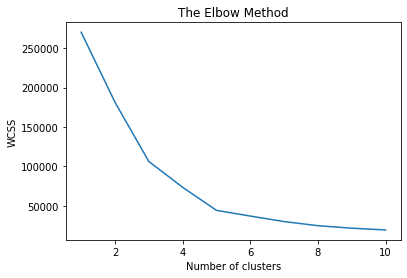

In [ ]:
#Finding optimal number of clusters using elbow method
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#Fitting k-means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

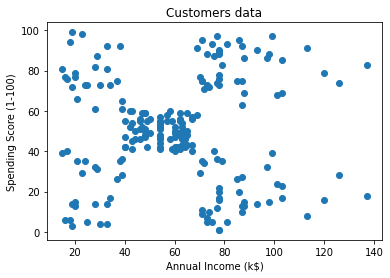

In [ ]:
#Plotting all values of customer data(income and score) on a scatterplot
plt.scatter(X[:,0],X[:,1])
plt.title('Customers data')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

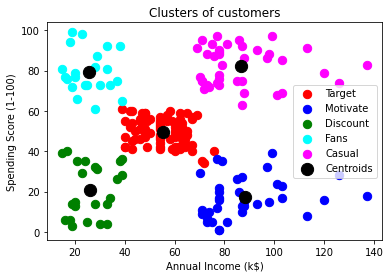

In [ ]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 70, c = 'red', label = 'Target')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 70, c = 'blue', label = 'Motivate')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 70, c = 'green', label = 'Discount')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 70, c = 'cyan', label = 'Fans')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 70, c = 'magenta', label = 'Casual')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 150, c = 'black', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()